In [1]:
import sys
import os
import pandas as pd
from pprint import pprint
wd = %pwd
parent = os.path.dirname(wd)
fdel = os.path.sep
sys.path.append(parent+fdel+"src")
from tedata import TE_Scraper, base
from tedata.utils import extract_and_convert_value, convert_metric_prefix, ready_datestr

INFO - tedata package initialized successfully!


In [29]:
base.find_active_drivers(close_all_drivers=True, close__all_scrapers=True)

INFO - Closing 1 active TE_Scraper instances...
INFO - Closing TE_Scraper instance
INFO - Scraper resources successfully released
INFO - Quitting 1 active webdriver instances...
INFO - Quitting driver (age: 365.4s)


{'Active webdrivers': [], 'Active TE_Scrapers': []}

In [30]:
# Test the scaling plot
url = 'https://tradingeconomics.com/australia/manufacturing-pmi'
scr = TE_Scraper(use_existing_driver = True, headless = True)  ## Initialize a new TE_scraper object.
scr.load_page(url, extra_wait_time=3) 
scr.scrape_metadata() ## Scrape the metadata for the data series from the page.

INFO - New firefox webdriver created.
INFO - Chart types dictionary created successfully: dict_keys(['Column', 'Spline', 'Areaspline', 'Stepline', 'Line', 'Area'])
INFO - Date span set to: 6M
INFO - 
Series metadata: 
 {'units': 'points', 'original_source': 'S&P Global', 'title': 'Australia S&P Global Manufacturing PMI', 'indicator': 'manufacturing pmi', 'country': 'australia', 'source': 'Trading Economics', 'id': 'australia/manufacturing-pmi'}


In [8]:
scr.date_spans

OrderedDict([('6M', 'a.hawk-chartOptions-datePicker-cnt-btn:nth-child(1)'),
             ('1Y', 'a.hawk-chartOptions-datePicker-cnt-btn:nth-child(2)'),
             ('2Y', 'a.hawk-chartOptions-datePicker-cnt-btn:nth-child(3)'),
             ('3Y', 'a.hawk-chartOptions-datePicker-cnt-btn:nth-child(4)')])

In [23]:
active = base.find_active_drivers()

In [27]:
active['Active webdrivers'][-1][0]

<tedata.base.TimestampedFirefox (session="dc6e1ee4-197c-4ad0-863d-c6fd56c6f9b8")>

In [9]:
scr.set_chartType_js("Spline")
scr.init_tooltipScraper()
datapoints = scr.tooltip_scraper.latest_points_js(num_points=10)

# Convert metric prefixes for the values in each datapoint
for point in datapoints:
    point["value"] = extract_and_convert_value(point["value"])[0]
    point["date"] = ready_datestr(point["date"])
latest_dates = [point["date"] for point in datapoints]
print("Latest dates: ", latest_dates)

## Get the frequency of the time series
date_series = pd.Series(latest_dates[::-1]).astype("datetime64[ns]")
print(pd.infer_freq(date_series))

INFO - Chart type set to: Spline (using JavaScript)
INFO - TooltipScraper object initialised successfully.
INFO - Chart type set to: Spline (using JavaScript)
INFO - Time taken to select chart type: 0.7702471400043578
INFO - Time taken to execute JS code: 3.7932052559990552


Latest dates:  ['Feb 2025', 'Jan 2025', 'Dec 2024', 'Nov 2024', 'Oct 2024', 'Sep 2024', 'Aug 2024']
MS


In [10]:
scr.set_max_date_span_viaCalendar()

INFO - Date span set to custom range: 1850-01-01 to 2025-03-14 (using JavaScript)


In [12]:
scr.tooltip_scraper.first_last_dates_js()

INFO - Successfully retrieved first/last dates.


Converted start_date: 2022-02-01 00:00:00
Converted end_date: 2025-02-01 00:00:00


{'end_date': Timestamp('2025-02-01 00:00:00'),
 'end_value': None,
 'start_date': Timestamp('2022-02-01 00:00:00'),
 'start_value': None}

In [13]:
scr.make_x_index(force_rerun_freqdet=True, force_rerun_xlims=True)
scr.get_y_axis(set_global_y_axis=True) 

Using selenium and tooltip scraping to construct the date time index for the time-series, this'll take a bit...


INFO - Date span set to: 6M
INFO - Chart type set to: Spline (using JavaScript)
INFO - Time taken to select chart type: 0.6453067320035188
INFO - Time taken to execute JS code: 3.9008790740044788


Frequency of time-series:  MS


INFO - Date span set to custom range: 1850-01-01 to 2025-03-14 (using JavaScript)
INFO - Chart type set to: Spline (using JavaScript)
INFO - Successfully retrieved first/last dates.


Converted end_date: 2025-02-01 00:00:00
Retrying start_end extraction...


INFO - Successfully retrieved first/last dates.
INFO - Start and end values scraped from tooltips: 
{'end_date': Timestamp('2025-02-01 00:00:00'), 'end_value': None, 'start_date': Timestamp('2022-02-01 00:00:00'), 'start_value': None}
INFO - DateTimeIndex created successfully for the time-series.
INFO - Y-axis values scraped successfully.


Converted start_date: 2022-02-01 00:00:00
Converted end_date: 2025-02-01 00:00:00
Start and end dates scraped from tooltips:  {'end_date': Timestamp('2025-02-01 00:00:00'), 'end_value': None, 'start_date': Timestamp('2022-02-01 00:00:00'), 'start_value': None}
y_heights:  [335.5, 296.5, 256.5, 217.5, 178.5, 138.5, 99.5, 60.5, 39.5]
pixheights:  [335.5, 296.5, 256.5, 217.5, 178.5, 138.5, 99.5, 60.5, 39.5]


pixheight
335.5    45.0
296.5    47.0
256.5    49.0
217.5    51.0
178.5    53.0
138.5    55.0
99.5     57.0
60.5     59.0
39.5     60.0
Name: ytick_label, dtype: float64

In [14]:
scr.series_from_chart_soup(set_max_datespan=True) ## Get the full series from the path element of the data trace on the svg chart.
scr.series

INFO - Series path extraction method: Extracting series data from chart soup.
INFO - Date span: MAX. Chart type: .splineChart, URL: https://tradingeconomics.com/australia/manufacturing-pmi.


0.000000       99.000000
0.000000       99.000000
10.316058      91.953333
17.193431      85.233333
24.807664      77.793333
                 ...    
646.350182    236.666667
653.964416    232.733333
661.578650    228.800000
673.000000    228.800000
673.000000    228.800000
Name: Extracted Series, Length: 109, dtype: float64

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 140

In [16]:
scr.apply_x_index()

INFO - DateTimeIndex applied to series, series attribute updated.


In [17]:
scr.series

2022-02-01     99.000000
2022-03-01     85.233333
2022-04-01     63.600000
2022-05-01    124.566667
2022-06-01    114.733333
2022-07-01    124.566667
2022-08-01    161.933333
2022-09-01    167.833333
2022-10-01    183.566667
2022-11-01    211.100000
2022-12-01    232.733333
2023-01-01    236.666667
2023-02-01    226.833333
2023-03-01    254.366667
2023-04-01    276.000000
2023-05-01    268.133333
2023-06-01    272.066667
2023-07-01    244.533333
2023-08-01    244.533333
2023-09-01    262.233333
2023-10-01    272.066667
2023-11-01    281.900000
2023-12-01    283.866667
2024-01-01    234.700000
2024-02-01    279.933333
2024-03-01    289.766667
2024-04-01    244.533333
2024-05-01    242.566667
2024-06-01    291.733333
2024-07-01    285.833333
2024-08-01    266.166667
2024-09-01    301.566667
2024-10-01    289.766667
2024-11-01    248.466667
2024-12-01    279.933333
2025-01-01    232.733333
2025-02-01    228.800000
Freq: MS, Name: manufacturing pmi, dtype: float64

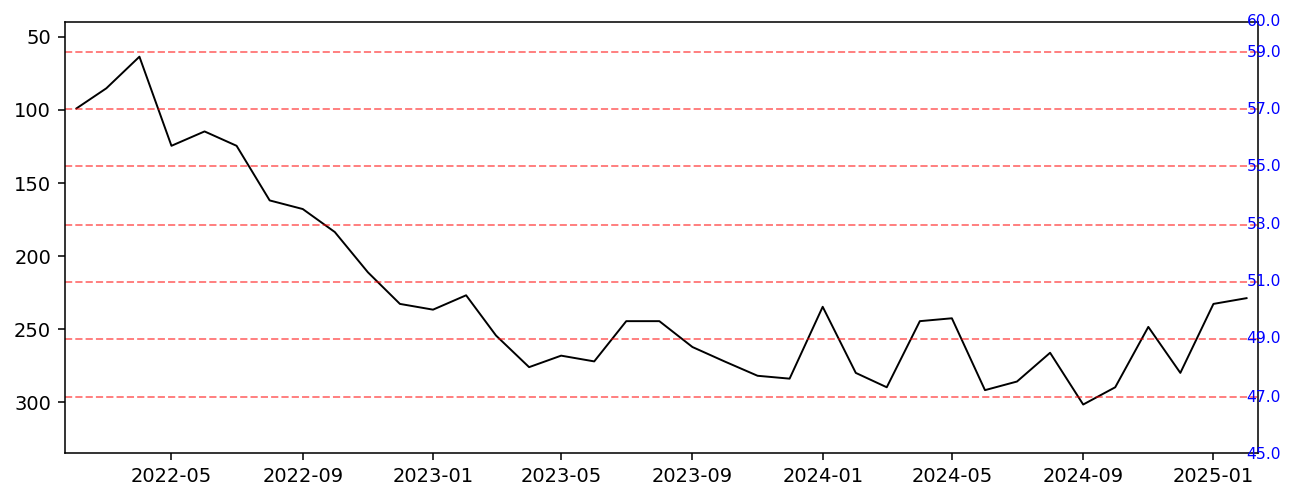

In [18]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.plot(scr.series, label = 'Unscaled series', lw = 1, c = 'black')
ax.set_ylim(scr.axis_limits["y_min"], scr.axis_limits["y_max"])
ax.margins(0.01, 0.02)
for px_pos, value in zip(scr.y_axis.index, scr.y_axis.values):
    ax.axhline(y=px_pos, color='r', linestyle='--', alpha=0.5, lw = 1)
    ax.text(max(scr.unscaled_series.index), px_pos, 
            f"{value}", va='center', ha='left', fontsize=8, color='b')

In [19]:
scr.scale_series()

INFO - Scale series method:  
unit_per_pix calculated from the y axis ticks: 0.050503663003663, 
unit_per_pix from axis limits and self.y_axis (probably best way): 0.05067567567567568
yaxis top tick: 60.0, yaxis bot tick: 45.0
axis_limits: 335.0, 40.0, y-axis series min & max pixel values: 335.5, 39.5


Unit per pix forumlation, 60.0, 45.0, 15.0, 296.0, 40.0, 335.0, 0.05067567567567568
Series crosses zero, x-axis should be at about pixel y-cordinate:  None


2022-02-01    56.984797
2022-03-01    57.682432
2022-04-01    58.778716
2022-05-01    55.689189
2022-06-01    56.187500
2022-07-01    55.689189
2022-08-01    53.795608
2022-09-01    53.496622
2022-10-01    52.699324
2022-11-01    51.304054
2022-12-01    50.207770
2023-01-01    50.008446
2023-02-01    50.506757
2023-03-01    49.111486
2023-04-01    48.015203
2023-05-01    48.413851
2023-06-01    48.214527
2023-07-01    49.609797
2023-08-01    49.609797
2023-09-01    48.712838
2023-10-01    48.214527
2023-11-01    47.716216
2023-12-01    47.616554
2024-01-01    50.108108
2024-02-01    47.815878
2024-03-01    47.317568
2024-04-01    49.609797
2024-05-01    49.709459
2024-06-01    47.217905
2024-07-01    47.516892
2024-08-01    48.513514
2024-09-01    46.719595
2024-10-01    47.317568
2024-11-01    49.410473
2024-12-01    47.815878
2025-01-01    50.207770
2025-02-01    50.407095
Freq: MS, Name: manufacturing pmi, dtype: float64

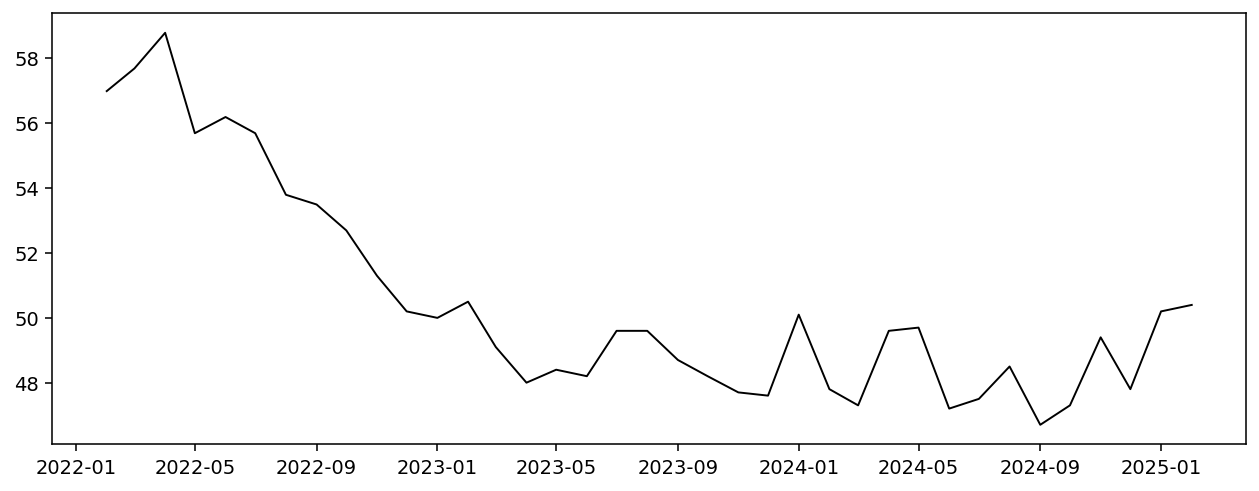

In [20]:
fig2, ax2 = plt.subplots()
ax2.plot(scr.series, label = 'Scaled_series', lw = 1, c = 'black')

In [80]:
examples = "12 k USD, 1200 B brazoReal, 1.2 G dollarz, 1.68 k Thousand USD, 1.68, ruffwons, 600 million dollars, 1.2 billion dollars, 1.2 trillion dollars, 1.2 quadrillion dollars, 6.73 %, 1 g %, 12.34 %, 30 thousand rupees"
examps = examples.split(", ")
for exam in examps:
    print(convert_metric_prefix(exam))
    

(12000.0, 'USD')
(1200000000000.0, 'brazoReal')
(1200000000.0, 'dollarz')
(1680.0, 'Thousand USD')
(1.68, '')
(nan, 'ruffwons')
(600000000.0, 'illion dollars')
(1200000000.0, 'illion dollars')
(1200000000000.0, 'rillion dollars')
(1.2, 'quadrillion dollars')
(6.73, '%')
(1000000000.0, '%')
(12.34, '%')
(30000000000000.0, 'housand rupees')


In [21]:
scr.plot_series()